# ANALYSIS OF PRIMARY SCHOOLS IN KIBERA, KANGEMI AND MATHARE

## PART 1: DATA CLEANING

In [1]:
#importing the necessary libraries
import pandas as pd
import json

In [3]:
#obtaining data and converting it to a python dictionary
file = 'openschools.json'
with open (file, 'r') as openfile:
    data = json.load(openfile)

In [174]:
#my interest is only the 'features' values
df = pd.DataFrame(data['features'])
df1 = df[["properties"]]

#creating a new json file with only the needed data
new_json = df1.to_json("filtered_data.json")

In [185]:
#getting the new json file
file = 'filtered_data.json'
with open(file) as openfile1:
    data1 = json.load(openfile1)

#Under features, my focus is only the data in the 'properties' section 
df2 = pd.DataFrame(data1["properties"])

#tranposing the dataframe
df2 = df2.transpose()
df2.head()

,large_photos,name,osm:_timestamp,osm:_user,osm:accessibility,osm:amenity,osm:building:levels,osm:building:material,osm:building:roof,osm:contact:address,...,osm:health_facility:referals,osm:medical_staff:counsellor,osm:medical_staff:description,osm:education:mean,osm:education:sanitary_towel,osm:education:teachers_tsc,osm:education:sports,osm:educations:sponsored_by,osm:contact:,osm:education:operator
0,[/data/images/cache/node/2954090746/https0079f...,ABC Kibera Academy,2021-09-27,Peter Agenga,foot,school,0,iron_sheet,iron_sheet,"PO Box 53138, Nairobi",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ABC Kibera Academy,2021-09-24,Peter Agenga,NaN,school,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Abib Kindergarten,2017-10-12,muindre,big_vehicles,school,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Abundant Grace Children Center,2021-10-02,fondolucy,NaN,school,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[/data/images/cache/node/1038103794/httpskchum...,Abundant Life School,2021-11-25,muindre,"small_cars,big_vehicles,foot",school,1,"concrete,cement_block",iron_sheet,62357-00100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
#viewing the columns in the dataframe -- to see all the columns I must use a for loop
for column in df2.columns:
    print(column)

large_photos
name
osm:_timestamp
osm:_user
osm:accessibility
osm:amenity
osm:building:levels
osm:building:material
osm:building:roof
osm:contact:address
osm:contact:phone
osm:education:bom_employed
osm:education:bom_how_many
osm:education:curriculum
osm:education:exam_center
osm:education:fees
osm:education:fees_per_year
osm:education:gender_type
osm:education:government_registered
osm:education:management_committee
osm:education:program_feeding
osm:education:pta
osm:education:students
osm:education:students_female
osm:education:students_male
osm:education:teachers
osm:education:teachers_female
osm:education:teachers_male
osm:education:teachers_trained
osm:education:teachers_tsc_registered
osm:education:teachers_undergoing_training
osm:education:teachers_untrained
osm:education:type
osm:electricity:operational_status
osm:id
osm:image:classroom
osm:image:compound
osm:image:other
osm:image:outside
osm:images
osm:large_images
osm:location
osm:name
osm:operator:description
osm:operator:typ

In [188]:
#the dataframe has too many unnecessary columns
#while it is possible to drop the unnecessary columns using pandas, it will be a tedious task.
#The best option is to convert the dataframe into an excel file and make the changes in excel
df2.to_excel("openschoools.xlsx")

In [248]:
#the data wrangling activities in excel involved removing unnecessary columns, duplicate columns, cheking and rectifying
#errors, and changing the data types
#opening the excel file and loading it in a dataframe
file2 = "openschoools.xlsx"
df3 = pd.read_excel(file2)

#checking the shape to confirm changes
df3.shape

(1145, 39)

In [249]:
#removing dulpicates
df3.drop_duplicates()
df3.shape

(1145, 39)

In [250]:
#setting osm:name as index
df3.set_index("osm:name", inplace=True)

In [251]:
#my interest is analyzing primary schools, so let's filter the data
#creating a dataframe for primary schools
condition1 = df3['osm:amenity'] == 'school'
condition2 = df3['osm:education:type'] == 'primary'
df_pri = df3[condition1 & condition2a]

In [252]:
df_pri.shape

(503, 38)

In [ ]:
# DATA IS NOW READY FOR ANALYSIS

## PART 2: DATA ANALYSIS AND VISUALIZATION

### Task_1 Composition of Primary Schools in Kibera, Kangemi, and Mathare

In [630]:
# Task_1 Composition of Schools in Kibera, Kangemi, and Mathare
df_schls = df_pri[['osm:location','osm:operator:type' ]]
df_grp = df_schls.groupby(['osm:location', 'osm:operator:type'], as_index=False).value_counts()

#creating a pivot table
df_pvt = df_grp.pivot(index='osm:location', columns='osm:operator:type')
df_pvt

count                                 
osm:operator:type community government ngo private religious
osm:location                                                
kangemi                   4         64   3      43         9
kibera                    3         55  12      84        37
mathare                  17         45   7      79        25

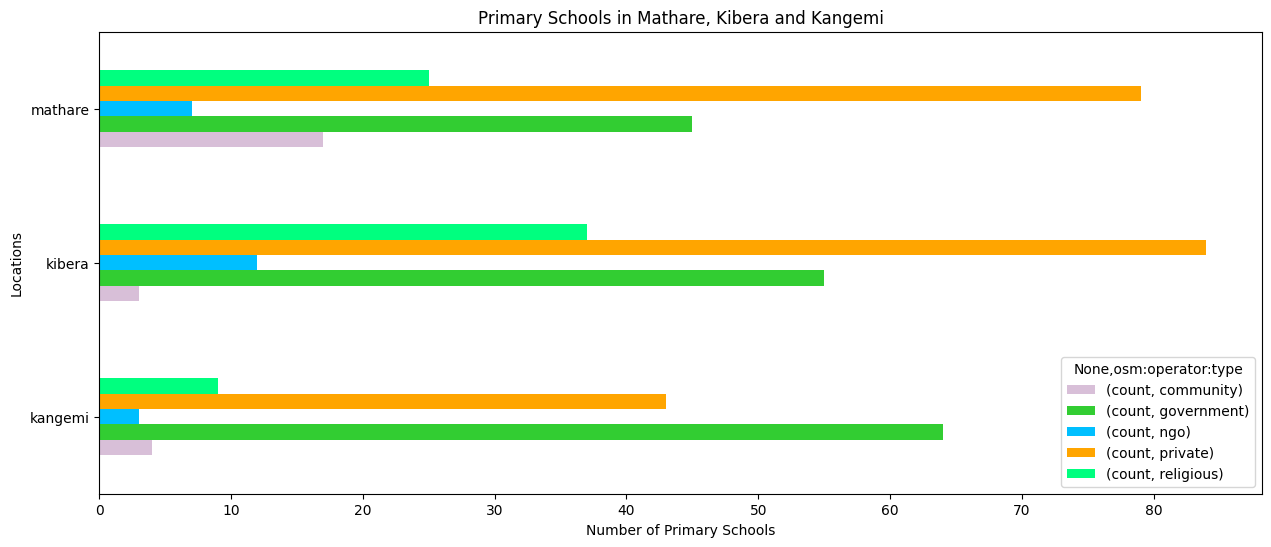

In [473]:
#column chart
import matplotlib.pyplot as plt

colors_lst = ['thistle','limegreen' ,'deepskyblue','orange','springgreen']
df_pvt.plot(kind='barh', figsize=(15,6), stacked=False, color=colors_lst)
plt.title('Primary Schools in Mathare, Kibera and Kangemi')
plt.ylabel('Locations')
plt.xlabel('Number of Primary Schools')
plt.show()

### Task_2 correlation between teacher/student ratio and performance

In [631]:
#filtering only primary schools that have provided their mean score

#first, standardizing the data type, filling the empty cells with 0
df_pri[['osm:education:mean_score']].fillna(0)

#filtering the data
mean_conditon = df_pri['osm:education:mean_score'] > 0
df_mean_score = df_pri[mean_condition]

In [286]:
#creating a new dataframe for task_2
df_task2 = df_mean_score[['osm:education:students', 'osm:education:teachers', 'osm:education:mean_score']]
df_task2

,osm:education:students,osm:education:teachers,osm:education:mean_score
osm:name,,,
Ananda Marga Academy,152.0,5.0,179.71
Ujamaa Community Based School,78.0,8.0,187.50
Petals Education Centre,50.0,7.0,188.80
Mumo Education Center,31.0,3.0,190.60
Kanyaa Educational Centre,255.0,13.0,212.00
...,...,...,...
Umoja Academy,316.0,15.0,50.36
Milkan Elite Education Center,100.0,9.0,50.70
Alpine School,56.0,3.0,54.00


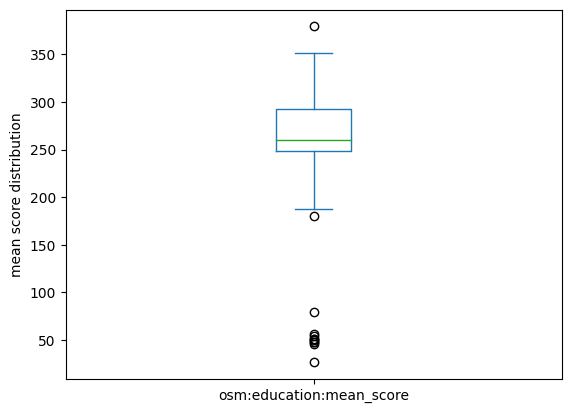

In [294]:
#checking for outliers in the mean_score data
df_task2['osm:education:mean_score'].plot(kind='box')
plt.ylabel('mean score distribution')
plt.show()

In [297]:
#removing the outliers
#first, importing numpy library
import numpy as np

#second, finding the upper and lower bounds
q75, q25 = np.nanpercentile(df_task2['osm:education:mean_score'], [75 ,25])
iqr = q75 - q25
upper_bound = q75 + (1.5*iqr)
lower_bound = q25 - (1.5*iqr)

#creating an outlier list
outlier_list = [x for x in df_task2['osm:education:mean_score'] if (
        (x < lower_bound) or (x > upper_bound))]
len(outlier_list)

#finaly, removing the outliers
df_cln = df_task2[~df_task2['osm:education:mean_score'].isin(outlier_list)]
df_cln


,osm:education:students,osm:education:teachers,osm:education:mean_score,student:teacher:ratio
osm:name,,,,
Ujamaa Community Based School,78.0,8.0,187.50,9.750000
Petals Education Centre,50.0,7.0,188.80,7.142857
Mumo Education Center,31.0,3.0,190.60,10.333333
Kanyaa Educational Centre,255.0,13.0,212.00,19.615385
Sancare Preparatory School,396.0,17.0,216.40,23.294118
...,...,...,...,...
Patsue Care Centre,78.0,10.0,327.70,7.800000
Billgates Care Primary,192.0,6.0,337.99,32.000000
Victory Blessed Toto Centre,190.0,9.0,340.00,21.111111


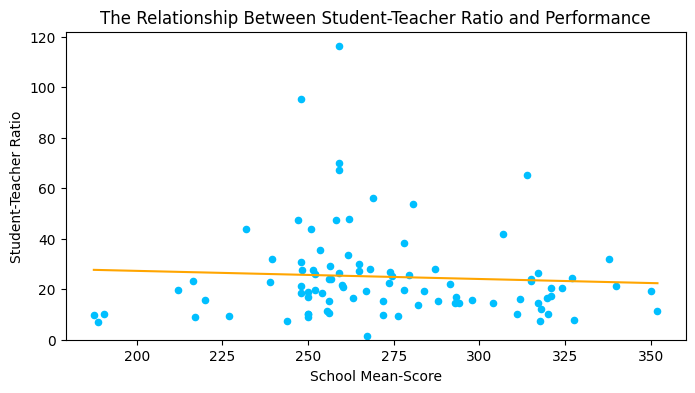

In [458]:
#Regression plot
#this is to show the correlation between student-teacher ration and mean-score, and the strength of the relationship

import numpy as np
x = df_cln['osm:education:mean_score']
y = df_cln['student:teacher:ratio']
fit = np.polyfit(x, y, deg=1)

#plotting the scatter plot
df_cln.plot(kind='scatter', x='osm:education:mean_score', y='student:teacher:ratio', figsize=(8,4), color='deepskyblue')

plt.ylim(0,)
plt.title('The Relationship Between Student-Teacher Ratio and Performance')
plt.ylabel('Student-Teacher Ratio')
plt.xlabel('School Mean-Score')

#plotting the line of best fit
plt.plot(x, fit[0]*x + fit[1], color='orange')

plt.show()

### Task_3 Key School Amenities -- Water, Electricity, Waste_disposal, and Toilet availability

In [667]:
#creating a new dataframe from elecricity
df_electricity = df_pri[['osm:electricity:operational_status']]

#Replacing the values 'always', 'often' and 'sometimes' with the value 'available', 
#missing values with 'not reported', and the value 'never' with 'not available'
df_cln1 = df_electricity[['osm:electricity:operational_status']].replace({np.nan:'not_reported','always':'available',
                                                                          'often':'available', 'sometimes':'available',
                                                                          'never':'not_available'})             
#renaming the column to 'availability_status'
df_cln2 = df_cln1.rename(columns = {'osm:electricity:operational_status':'availability_status'})

#grouping the data and renaming the new column
df_grp1 = df_cln2.groupby(['availability_status'], as_index=True).value_counts().to_frame()
df_grp2 = df_grp1.rename(columns = {0:'electricity_availability'})
df_grp2

,electricity_availability
availability_status,
available,344
not_available,71
not_reported,88


In [675]:
#Pie Chart to show electricity availability in Primary Schools
#defining  a fuction for creating a pie chart for reuse purposes

def my_pie(my_data, my_column, my_amenity, my_color_list):
    explode_list = [0.1, 0, 0]
    my_data[my_column].plot(kind='pie',
                figsize = (8,4),
                autopct = '%1.1f%%',
                startangle = 90,
                pctdistance = 0.5,
                labels = df_grp2.index,
                colors = my_color_list,
                explode = explode_list)
    plt.title(f"{my_amenity} Availabilty Status in Primary Schools in Kibera, Kangemi, and Mathare")
    plt.ylabel('')
    plt.axis('equal')
    plt.show()

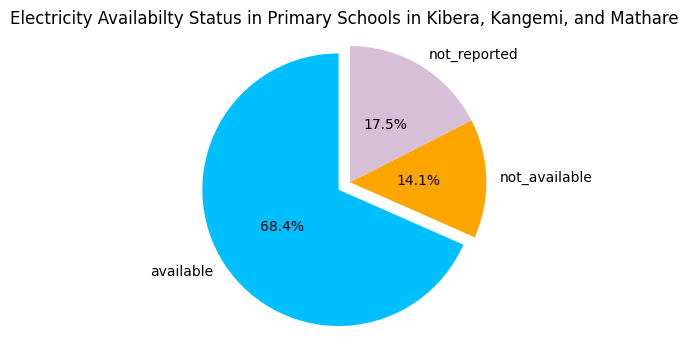

In [676]:
#Pie Chart electricity availability
color_list = ['deepskyblue', 'orange', 'thistle']
my_pie(df_grp2, 'electricity_availability', 'Electricity', color_list)

In [670]:
#water availability
#creating a new dataframe
df_water = df_pri[['osm:water:source']]

#replacing the values 'water_tank' and 'tap' with the value = 'available', missing values with 'not_reported'
#and 'None' with 'not_available'
df_water1 = df_water[['osm:water:source']].replace({np.nan:'not_reported', 'water_tank':'available',
                                                    'tap':'available', 'None':'not_available'})
                
#renaming the column to 'availability_status'
df_water2 = df_water1.rename(columns = {'osm:water:source':'availability_status'})

#grouping the data and renaming the new column
df_grp3 = df_water2.groupby(['availability_status'], as_index=True).value_counts().to_frame()
df_grp4 = df_grp3.rename(columns = {0:'water_availability'})
df_grp4

,water_availability
availability_status,
available,240
not_available,1
not_reported,262


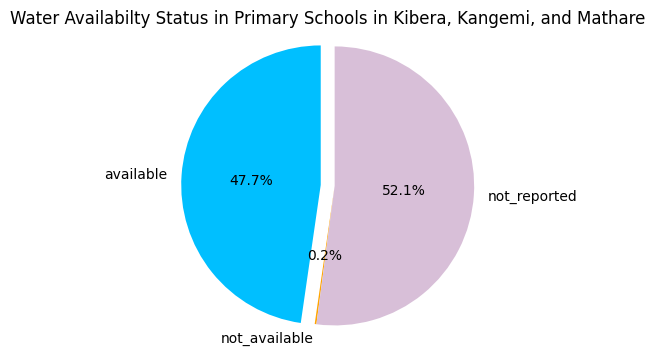

In [677]:
#Pie Chart - water availability in Primary Schools
color_list1 = ['deepskyblue', 'orange', 'thistle' ]
my_pie(df_grp4, 'water_availability', 'Water', color_list1)

In [672]:
#waste_disposal
#creating a new dataframe
df_waste = df_pri[['osm:waste:garbage_disposal']]

#replacing values
df_waste1 = df_waste[['osm:waste:garbage_disposal']].replace({np.nan:'not_reported', 'Always':'available',
                                                              'often':'available', 'sometimes':'available',
                                                              'Sometimes':'available', 'never':'not_available',
                                                              'always':'available'})

#renaming the column to 'availability_status'
df_waste2 = df_waste1.rename(columns = {'osm:waste:garbage_disposal':'availability_status'})

#grouping the data and renaming the new column
df_grp5 = df_waste2.groupby(['availability_status'], as_index=True).value_counts().to_frame()
df_grp6 = df_grp5.rename(columns = {0:'waste_disposal'})
df_grp6

,waste_disposal
availability_status,
available,55
not_available,5
not_reported,443


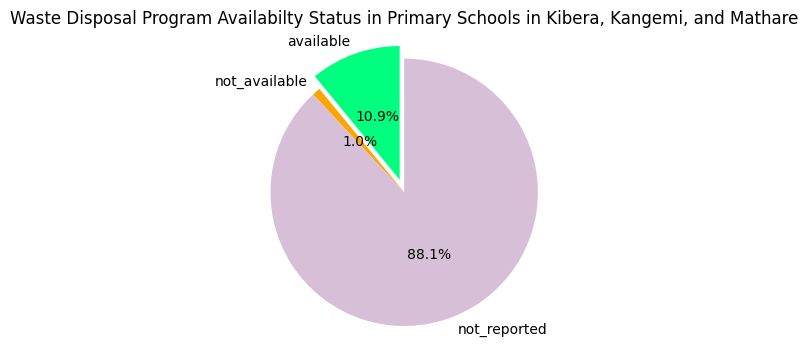

In [678]:
#Pie Chart to show availability of a Waste Disposal Program in Primary Schools
color_list2 = ['springgreen', 'orange', 'thistle' ]
my_pie(df_grp6, 'waste_disposal', 'Waste Disposal Program', color_list2)

In [679]:
#toilet availability
#creating a new dataframe
df_toilet = df_pri[['osm:toilet:present']]

#replacing values
df_toilet1 = df_toilet[['osm:toilet:present']].replace({np.nan:'not_reported', 'arranged':'available',
                                                        'inside school compound':'available', 
                                                        'outside_government':'available', 
                                                        'outside_government_arranged':'available',
                                                        'outside_public':'available',
                                                        'outside_public_arranged':'available', 'yes':'available',
                                                        'no':'not_available'})

#renaming the column to 'availability_status'
df_toilet2 = df_toilet1.rename(columns = {'osm:toilet:present':'availability_status'})

#grouping the data and renaming the new column
df_grp7 = df_toilet2.groupby(['availability_status'], as_index=True).value_counts().to_frame()
df_grp8 = df_grp7.rename(columns = {0:'toilet availability'})
df_grp8

,toilet availability
availability_status,
available,379
not_available,5
not_reported,119


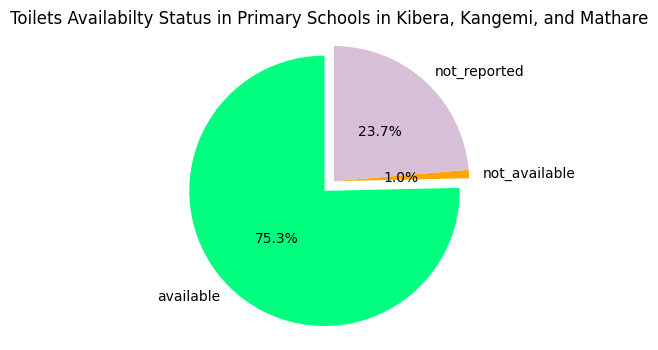

In [680]:
#Pie Chart to show availability of toilets in Primary Schools
color_list3 = ['springgreen', 'orange', 'thistle' ]
my_pie(df_grp8, 'toilet availability', 'Toilets', color_list3)

In [460]:
#merging the four dataframes
df_amenities = pd.merge(df_grp2, df_grp4, left_index=True, right_index=True)
df_amenities1 = pd.merge(df_amenities, df_grp6, left_index=True, right_index=True)
df_amenities2 = pd.merge(df_amenities1, df_grp8, left_index=True, right_index=True)

df_amenities2

,electricity_availability,water_availability,waste_disposal,toilet availability
availability_status,,,,
available,344,240,55,379
not_available,71,1,5,5
not_reported,88,262,443,119


In [461]:
#transposing the dataframe
df_amenities3 = df_amenities2.transpose()
df_amenities3

availability_status,available,not_available,not_reported
electricity_availability,344,71,88
water_availability,240,1,262
waste_disposal,55,5,443
toilet availability,379,5,119


In [683]:
#creating a stacked bar chart
#definining the bar chart function
def my_stacked_chart(my_df, my_chart_title):
    colors_lst = ['limegreen', 'orange', 'thistle']
    my_df.plot(kind='barh', figsize=(8,4), stacked=True, color=colors_lst)
    plt.title(my_chart_title)
    plt.xlabel('Number of Primary Schools')
    plt.legend(bbox_to_anchor=(1.25,1), loc='upper right')
    plt.show()

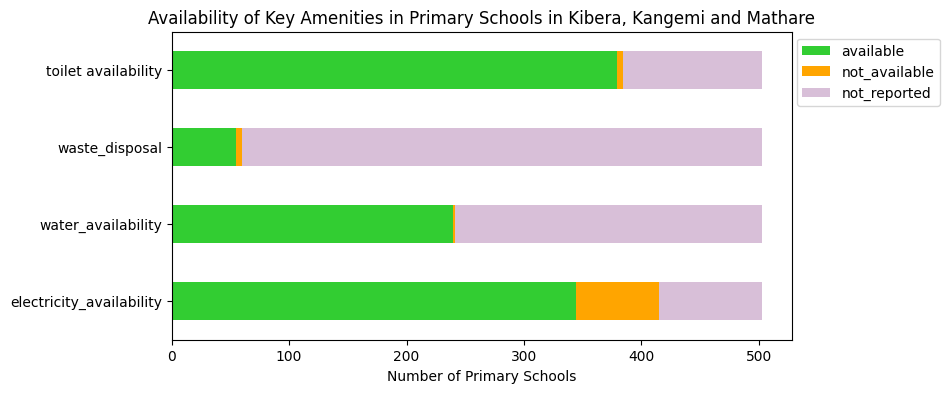

In [684]:
#stacked bar chart showing a summary of the key amenities
my_stacked_chart(df_amenities3,'Availability of Key Amenities in Primary Schools in Kibera, Kangemi and Mathare')

### Task _4 Special Programs -- Feeding, Orphans, Counselling, Sanitary Towels, Special Needs, Computer

In [544]:
#selecting only  the required columns
df_sp = df_pri[['osm:education:program_feeding', 'osm:education:program_orphans', 
                'osm:education:program_counselling', 'osm:education:program_sanitary_towel', 
                'osm:education:program_special_needs','osm:education:program_computers' ]]

#replacing values to ensure uniformity across all columns
df_sp1 = df_sp.replace({np.nan:'not reported', 'central_feeding':'yes', 'none':'no', '2,700':'yes', '2700':'yes', 'fees':'yes',
                       'other':'yes', 'sponsored':'yes', 'feed_the_child':'yes', 'Part of the fees':'yes', '4500 P.A':'yes',
                       'feeding':'yes', 'Yes':'yes', 'ngo':'yes'})

In [538]:
#creating a new dataframe for the feeding program
df_sp2 = df_sp1.rename(columns={'osm:education:program_feeding':'program_availability'})
df_grp9 = df_sp2[['program_availability']].groupby(['program_availability'], 
                 as_index=True).value_counts().to_frame()
df_feeding = df_grp9.rename(columns = { 0:'feeding_program'})
df_feeding

,feeding_program
program_availability,
no,50
not reported,121
yes,332


In [599]:
#plot a waffle chart to see the number of schools with special program in comparison to the whole (all schools)

#defining a function for creating a waffle chart
def my_waffle(df, Column, Title):
    #importing the required libraries
    import matplotlib.patches as mpatches

    #calculating the total number of schools
    total = sum(df[Column])

    #calculating the proportion of each program_availability options
    proportions = [(float(value) / total) for value in df[Column]]

    #specifying the width and height of the chart
    width = 50
    height = 10
    total_tiles = width * height

    #how many tiles per category
    tiles_per_cat = [round(proportion * total_tiles) for proportion in proportions]

    #generating the waffle
    waffle = np.zeros((height, width))
    category_index = 0
    tile_index = 0

    for col in range(width):
        for row in range(height):
            tile_index +=1
            if tile_index > sum(tiles_per_cat[0:category_index]):
                category_index +=1
            waffle[row,col] = category_index

    #maping the chart into a visual
    fig = plt.figure()
    colormap = plt.cm.summer
    plt.matshow (waffle, cmap=colormap)

    #pretiffying the chart
    ax = plt.gca()
    ax.set_xticks(np.arange(-0.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, (height), 1), minor=True)
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
    plt.xticks([])
    plt.yticks([])
    plt.title(Title)

    values = df[Column]
    categories = df.index.values
    value_sign = ''
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    legend_handles = []
    for i, category in enumerate (categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
        color_val = colormap(float(values_cumsum[i] / total_values))
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    plt.legend(handles = legend_handles,
              loc = 'lower center',
              ncol = len(categories),
               bbox_to_anchor = (0., -0.2, 0.95, .1))

    plt.colorbar()

<Figure size 640x480 with 0 Axes>

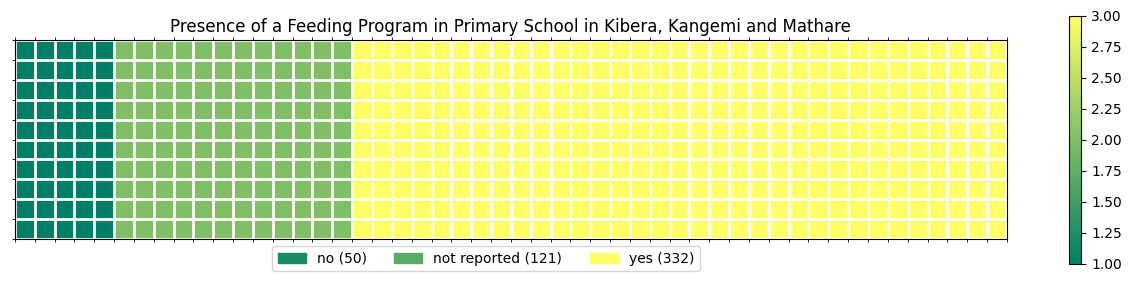

In [600]:
#waffle chart 1 - feeding program
my_waffle(df_feeding, 'feeding_program', 'Presence of a Feeding Program in Primary School in Kibera, Kangemi and Mathare')

In [540]:
#creating a new dataframe for the orphans program
df_sp3 = df_sp1.rename(columns={'osm:education:program_orphans':'program_availability'})
df_grp10 = df_sp3[['program_availability']].groupby(['program_availability'], 
                 as_index=True).value_counts().to_frame()
df_orphans = df_grp10.rename(columns = { 0:'orphans_program'})
df_orphans

,orphans_program
program_availability,
no,73
not reported,240
yes,190


<Figure size 640x480 with 0 Axes>

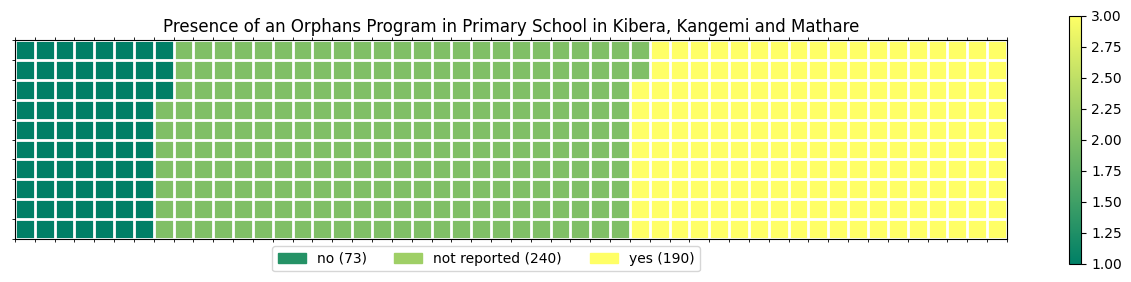

In [595]:
#waffle chart 2 - orphans program
my_waffle(df_orphans, 'orphans_program', 'Presence of an Orphans Program in Primary School in Kibera, Kangemi and Mathare')

In [541]:
#creating a new dataframe for the counselling program
df_sp4 = df_sp1.rename(columns={'osm:education:program_counselling':'program_availability'})
df_grp11 = df_sp4[['program_availability']].groupby(['program_availability'], 
                 as_index=True).value_counts().to_frame()
df_counselling = df_grp11.rename(columns = { 0:'counselling_program'})
df_counselling

,counselling_program
program_availability,
no,19
not reported,162
yes,322


<Figure size 640x480 with 0 Axes>

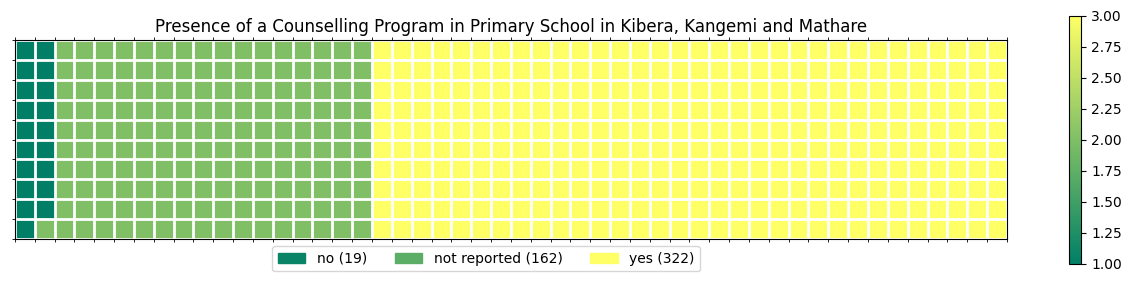

In [596]:
#waffle chart 3 - counselling program
my_waffle(df_counselling, 'counselling_program', 'Presence of a Counselling Program in Primary School in Kibera, Kangemi and Mathare')

In [542]:
#creating a new dataframe for the sanitary towels program
df_sp5 = df_sp1.rename(columns={'osm:education:program_sanitary_towel':'program_availability'})
df_grp12 = df_sp5[['program_availability']].groupby(['program_availability'], 
                 as_index=True).value_counts().to_frame()
df_san_towels = df_grp12.rename(columns = { 0:'sanitary_towels_program'})
df_san_towels

,sanitary_towels_program
program_availability,
no,152
not reported,215
yes,136


<Figure size 640x480 with 0 Axes>

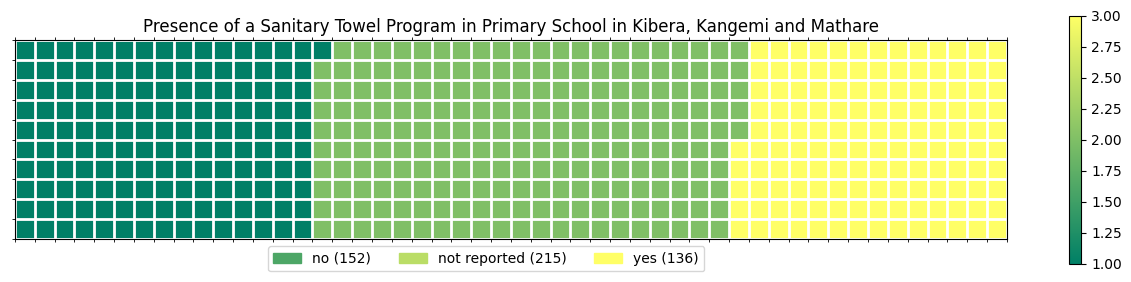

In [601]:
#waffle chart 4 - sanitary_towel program
my_waffle(df_san_towels, 'sanitary_towels_program', 
          'Presence of a Sanitary Towel Program in Primary School in Kibera, Kangemi and Mathare')

In [543]:
#creating a new dataframe for the special_needs program
df_sp6 = df_sp1.rename(columns={'osm:education:program_special_needs':'program_availability'})
df_grp13 = df_sp6[['program_availability']].groupby(['program_availability'], 
                 as_index=True).value_counts().to_frame()
df_spc_needs = df_grp13.rename(columns = { 0:'special_needs_program'})
df_spc_needs

,special_needs_program
program_availability,
no,131
not reported,245
yes,127


<Figure size 640x480 with 0 Axes>

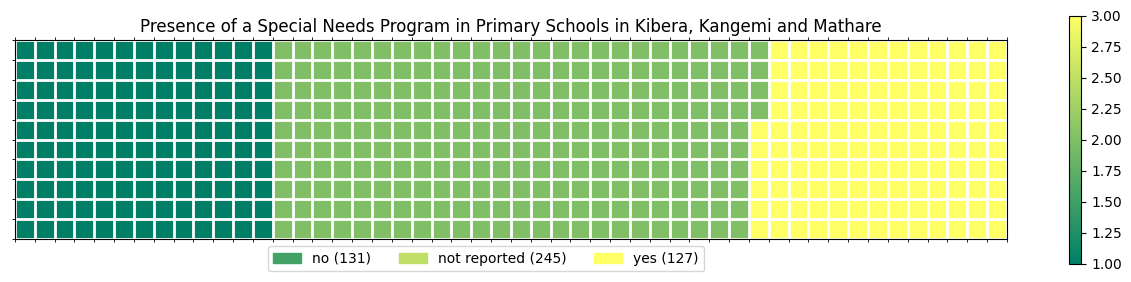

In [603]:
#waffle chart 5 - special_needs_program program
my_waffle(df_spc_needs, 'special_needs_program', 
          'Presence of a Special Needs Program in Primary Schools in Kibera, Kangemi and Mathare')

In [626]:
#creating a new dataframe for the computer program
df_sp7 = df_sp1.rename(columns={'osm:education:program_computers':'program_availability'})
df_grp14 = df_sp7[['program_availability']].groupby(['program_availability'], 
                 as_index=True).value_counts().to_frame()
df_computer = df_grp14.rename(columns = { 0:'computer_program'})

df_computer

,computer_program
program_availability,
not reported,500
yes,3


<Figure size 640x480 with 0 Axes>

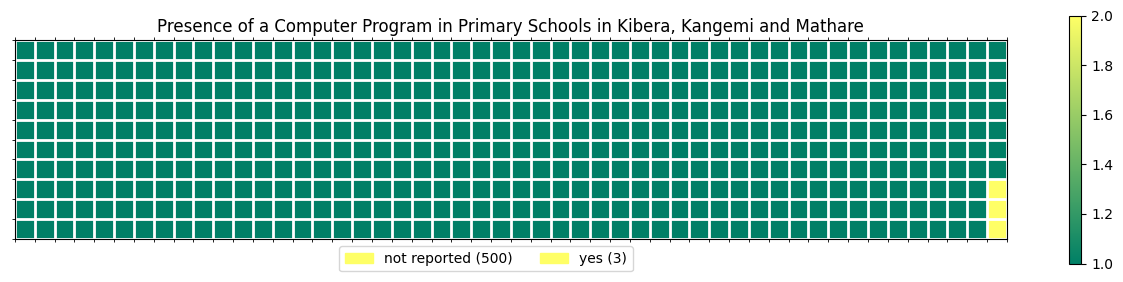

In [627]:
#waffle chart 6 - computer program
my_waffle(df_computer, 'computer_program', 
          'Presence of a Computer Program in Primary Schools in Kibera, Kangemi and Mathare')

In [628]:
#merging the dataframes
df_s_programs = pd.merge(df_feeding, df_orphans, left_index=True, right_index=True)
df_s_programs1 = pd.merge(df_s_programs, df_counselling, left_index=True, right_index=True)
df_s_programs2 = pd.merge(df_s_programs1, df_san_towels, left_index=True, right_index=True)
df_s_programs3 = pd.merge(df_s_programs2, df_spc_needs, left_index=True, right_index=True)
df_s_programs4 = pd.merge(df_s_programs3, df_computer, left_index=True, right_index=True, how='outer')
df_s_programs4['computer_program'] = df_s_programs4['computer_program'].replace(np.nan, 0).astype('int')
df_s_programs4

,feeding_program,orphans_program,counselling_program,sanitary_towels_program,special_needs_program,computer_program
program_availability,,,,,,
no,50,73,19,152,131,0
not reported,121,240,162,215,245,500
yes,332,190,322,136,127,3


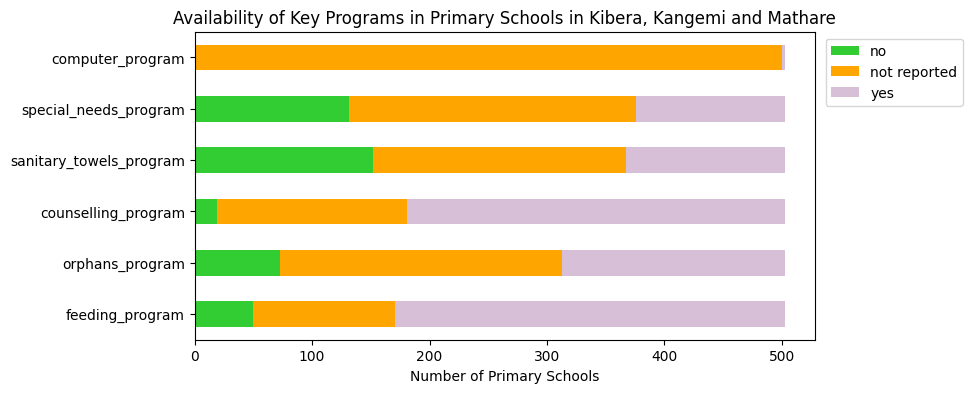

In [685]:
#A stacked bar chart showing a summary of the key progra s
my_stacked_chart(df_s_programs4,'Availability of Key Programs in Primary Schools in Kibera, Kangemi and Mathare')

### Task 5 Extracurricular Activities -- Drama, Music, Sports, Scouts/Girl Guides

In [634]:
#selecting only  the required columns
df_x = df_pri[['osm:education:extra_drama', 'osm:education:extra_music', 
                'osm:education:extra_sports', 'osm:education:extra_scouts/girl_guide' ]]

#replacing values to ensure uniformity across all columns
df_x = df_x.replace({np.nan:'not reported'})

df_x.head()

,osm:education:extra_drama,osm:education:extra_music,osm:education:extra_sports,osm:education:extra_scouts/girl_guide
osm:name,,,,
Ack St Mary's School Kabete,yes,yes,yes,yes
Benock Morning Star Education Centre,no,no,yes,not reported
Blessed Hope Child Centre,yes,yes,yes,yes
Bornstar Children Center,yes,yes,yes,yes
Carevas School For The Needy,no,yes,yes,not reported


In [635]:
#creating a new dataframe for drama
df_x1 = df_x.rename(columns={'osm:education:extra_drama':'program_availability'})
df_grp15 = df_x1[['program_availability']].groupby(['program_availability'], 
                 as_index=True).value_counts().to_frame()
df_drama = df_grp15.rename(columns = { 0:'Drama'})
df_drama

,Drama
program_availability,
no,97
not reported,170
yes,236


In [658]:
#creating a bar chart
#let's define the fucntion for reuse
def my_barchart(my_data, my_color, my_program):
    ax = my_data.plot(kind='bar', figsize=(8,4), stacked=False, color= my_color)
    ax.bar_label(ax.containers[0])
    plt.title(f'Availability of a {my_program} Program in Primary Schools in Kibera, Kangemi and Mathare')
    plt.ylabel('Number of Primary Schools')
    plt.legend(bbox_to_anchor=(1.25,1), loc='upper right')
    plt.show()

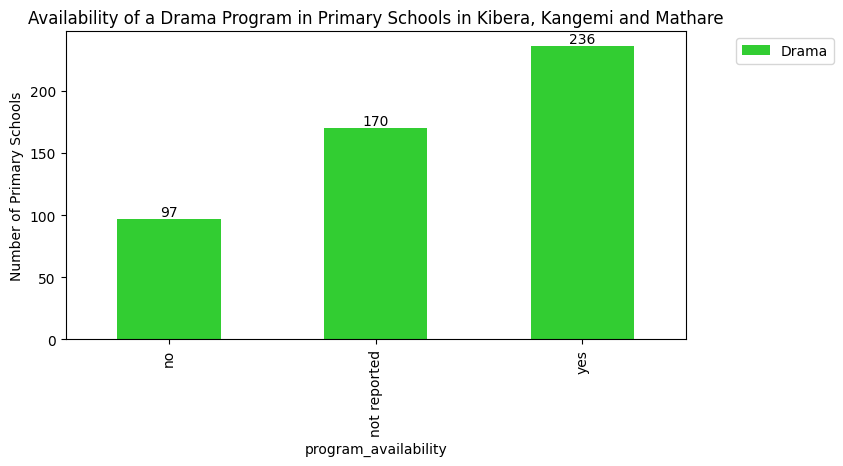

In [657]:
#creating a bar chart for the drama program
my_barchart(df_drama, 'limegreen', 'Drama')

In [636]:
#creating a new dataframe for music
df_x2 = df_x.rename(columns={'osm:education:extra_music':'program_availability'})
df_grp16 = df_x2[['program_availability']].groupby(['program_availability'], 
                 as_index=True).value_counts().to_frame()
df_music = df_grp16.rename(columns = { 0:'Music'})
df_music

,Music
program_availability,
no,86
not reported,166
yes,251


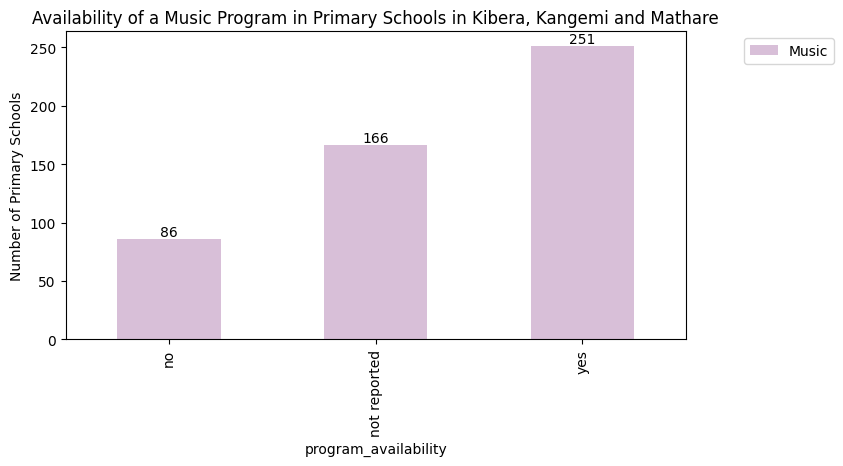

In [656]:
#creating a bar chart for the music program
my_barchart(df_music, 'thistle', 'Music')

In [637]:
#creating a new dataframe for sports
df_x3 = df_x.rename(columns={'osm:education:extra_sports':'program_availability'})
df_grp17 = df_x3[['program_availability']].groupby(['program_availability'], 
                 as_index=True).value_counts().to_frame()
df_sports = df_grp17.rename(columns = { 0:'Sports'})
df_sports

,Sports
program_availability,
no,40
not reported,129
yes,334


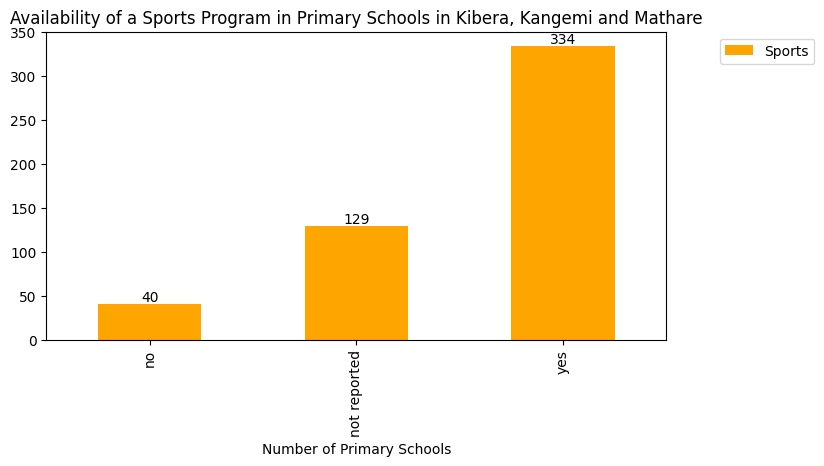

In [648]:
#creating a bar chart for the sports program
my_barchart(df_sports, 'orange', 'Sports')

In [639]:
#creating a new dataframe for scouts and girl guides
df_x4 = df_x.rename(columns={'osm:education:extra_scouts/girl_guide':'program_availability'})
df_grp18 = df_x4[['program_availability']].groupby(['program_availability'], 
                 as_index=True).value_counts().to_frame()
df_scouts_gg = df_grp18.rename(columns = { 0:'Scouts/Girl Guides'})
df_scouts_gg

,Scouts/Girl Guides
program_availability,
not reported,252
yes,251


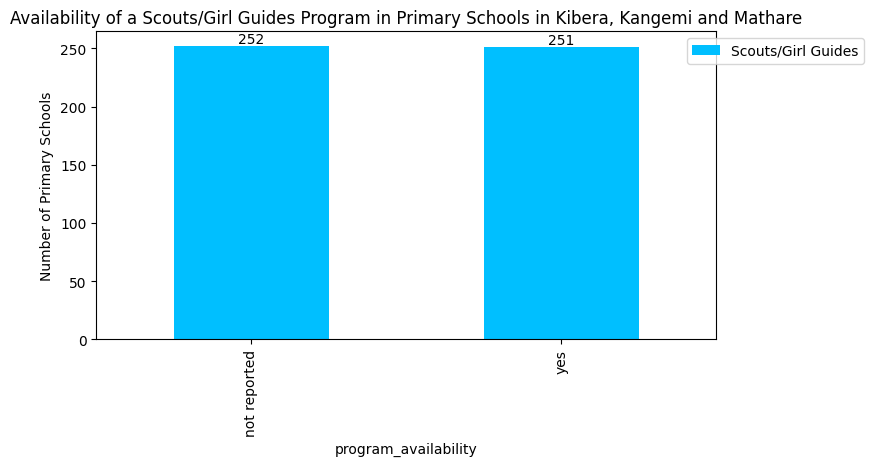

In [660]:
#creating a bar chart for the scouts/girl guides program
my_barchart(df_scouts_gg, 'deepskyblue', 'Scouts/Girl Guides')

In [641]:
#merging the dataframes
df_extra = pd.merge(df_drama, df_music, left_index=True, right_index=True)
df_extra1 = pd.merge(df_extra, df_sports, left_index=True, right_index=True)
df_extra2 = pd.merge(df_extra1, df_scouts_gg, left_index=True, right_index=True, how='outer')
df_extra2['Scouts/Girl Guides'] = df_extra2['Scouts/Girl Guides'].replace(np.nan, 0).astype('int')
df_extra2

,Drama,Music,Sports,Scouts/Girl Guides
program_availability,,,,
no,97,86,40,0
not reported,170,166,129,252
yes,236,251,334,251


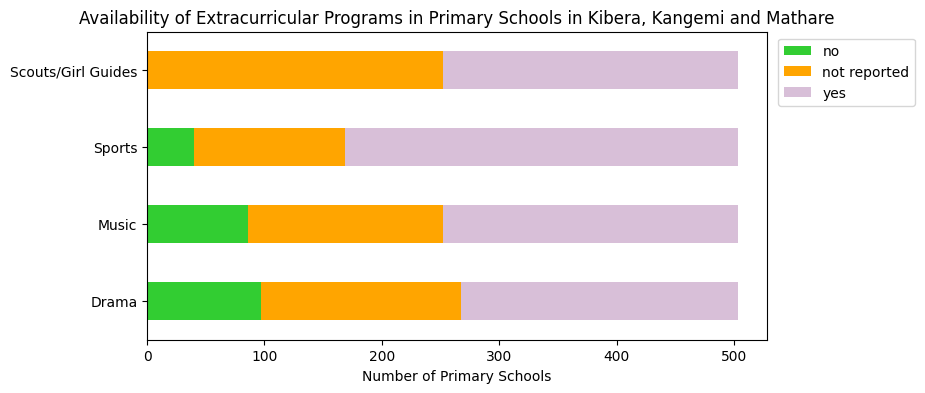

In [686]:
#A stacked bar chart showing a summary of the extracurricular programs
my_stacked_chart(df_extra2,'Availability of Extracurricular Programs in Primary Schools in Kibera, Kangemi and Mathare')

                                                END OF ANALYSIS